In [ ]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=02c011669e219e2e9a540744d9a85f11d63147c4d351ce41cdea1aafb7b53710
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
# Load the dataset
data = pd.read_csv('/content/Test.csv')

In [22]:
# Display the first few rows of the dataset
print("Dataset Sample:")
print(data.head())

Dataset Sample:
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  


In [23]:
# Identify numerical and categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

In [24]:
# Preprocessing the data
# One-Hot encode categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),      # Scaling numerical columns
        ('cat', OneHotEncoder(), categorical_cols)    # One-hot encoding categorical columns
    ])


In [25]:
# Apply transformations
data_processed = preprocessor.fit_transform(data)

In [26]:
# Convert the result back to a DataFrame for easier visualization (optional)
processed_df = pd.DataFrame(data_processed.toarray() if hasattr(data_processed, 'toarray') else data_processed)

print("Processed Data Sample:")
print(processed_df.head())


Processed Data Sample:
         0         1         2      3    4    5    6    7    8    9   ...  \
0  0.000000  0.253521  0.000000  0.000  1.0  0.0  0.0  1.0  0.0  0.0  ...   
1  0.000557  0.267606  0.571429  0.375  0.0  1.0  0.0  1.0  0.0  0.0  ...   
2  0.000780  0.718310  0.000000  0.000  1.0  0.0  0.0  1.0  0.0  1.0  ...   
3  0.001225  0.577465  0.785714  0.125  0.0  1.0  0.0  1.0  0.0  1.0  ...   
4  0.001336  0.014085       NaN  0.375  1.0  0.0  1.0  0.0  0.0  1.0  ...   

    23   24   25   26   27   28   29   30   31   32  
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 33 columns]


In [27]:
# Initialize the SOM
# x, y: dimensions of the SOM grid, these can be adjusted based on the dataset size
# input_len: number of features in the dataset
som = MiniSom(x=10, y=10, input_len=data_processed.shape[1], sigma=1.0, learning_rate=0.5)

In [28]:
# Randomly initialize the weights
som.random_weights_init(data_processed)


In [29]:
# Train the SOM
print("Training SOM...")
som.train_random(data_processed, num_iteration=100)

Training SOM...


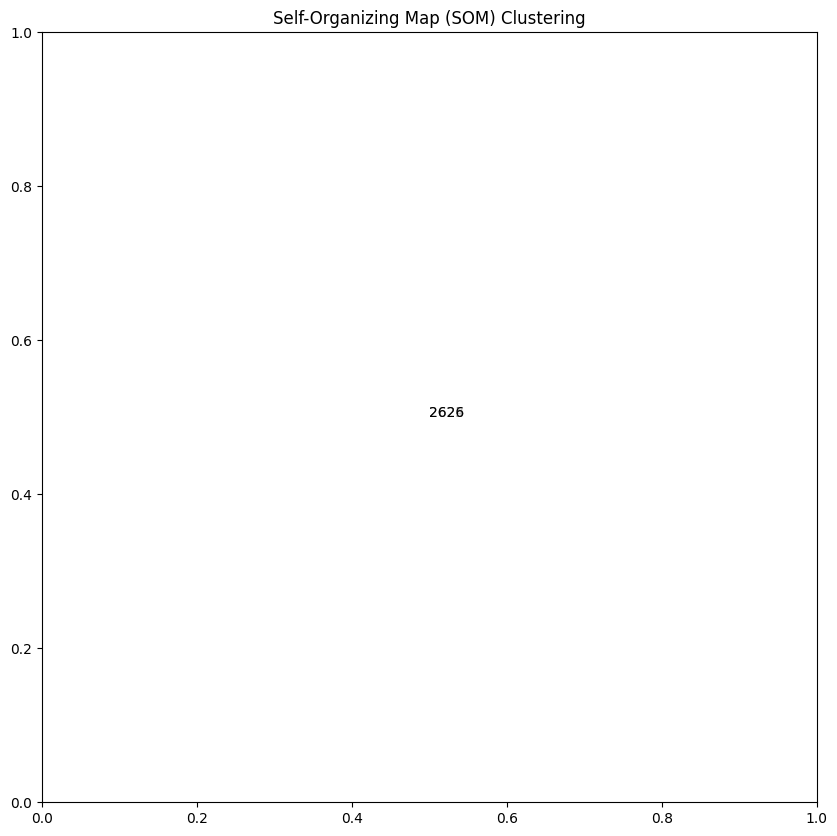

In [30]:
# Visualize the results - This visualizes the SOM and clusters
plt.figure(figsize=(10, 10))
for i, x in enumerate(data_processed):
    w = som.winner(x)  # Get the winning node
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i),
             bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.title('Self-Organizing Map (SOM) Clustering')
plt.show()


In [39]:
# Quantization Error: Measures the average distance between each data point and its BMU
quantization_error = som.quantization_error(data_processed)
print(f"Quantization Error: {quantization_error}")


Quantization Error: nan


In [32]:
# Topographic Error: Measures the proportion of data points for which the first and second BMUs are not adjacent
def topographic_error(som, data):
    error_count = 0
    for x in data:
        # Find the first and second best matching units (BMUs)
        bmu_1 = som.winner(x)
        distances = np.linalg.norm(som.get_weights() - x, axis=-1)
        bmu_2 = np.unravel_index(np.argsort(distances.ravel())[1], distances.shape)

In [46]:
# Calculate the Topographic Error
topographic_err = topographic_error(som, data_processed)
print(f"Topographic Error: {topographic_err}")

Topographic Error: None


In [43]:
# Winning nodes for each data point
print("Winning nodes for each data point:")
winning_nodes = [som.winner(x) for x in data_processed]
print(winning_nodes)

Winning nodes for each data point:
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 

In [44]:
# Optional: If you want to categorize your data points based on clusters
clusters = {}
for i, win in enumerate(winning_nodes):
    if win not in clusters:
        clusters[win] = []
    clusters[win].append(i)

In [45]:
# Display clustered data points
print("Clusters formed:")
for cluster, points in clusters.items():
    print(f"Cluster {cluster}: {points}")

Clusters formed:
Cluster (0, 0): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 2